In [1]:
!pip3 install -U scikit-learn scipy matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ahmed\Desktop\proxies\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python --version

Python 3.10.5


In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import necessary libraries
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Exploratory Data Analysis (EDA)

In [6]:
# Set paths
train_dir = 'D:/projects/Caries Detection/teeth_dataset/train'
test_dir = 'D:/projects/Caries Detection/teeth_dataset/test'

In [7]:
# Count the number of images in each class
train_caries_count = len(os.listdir(os.path.join(train_dir, 'caries')))
train_no_caries_count = len(os.listdir(os.path.join(train_dir, 'no-caries')))
test_caries_count = len(os.listdir(os.path.join(test_dir, 'caries')))
test_no_caries_count = len(os.listdir(os.path.join(test_dir, 'no-caries')))

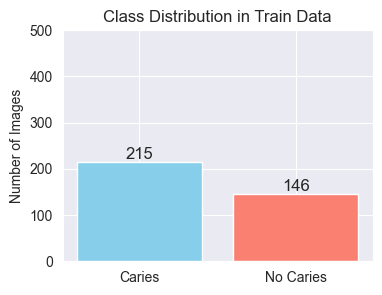

In [8]:

# Plotting
plt.figure(figsize=(4, 3))

labels = ['Caries', 'No Caries']
counts = [train_caries_count, train_no_caries_count]

plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Train Data')
plt.ylabel('Number of Images')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.ylim(0, 500)
plt.show()

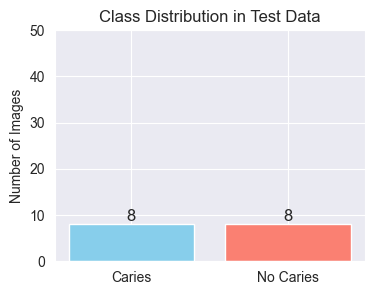

In [9]:
# Plotting
plt.figure(figsize=(4, 3))

labels = ['Caries', 'No Caries']
counts = [test_caries_count, test_no_caries_count]

plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Test Data')
plt.ylabel('Number of Images')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.ylim(0, 50)
plt.show()

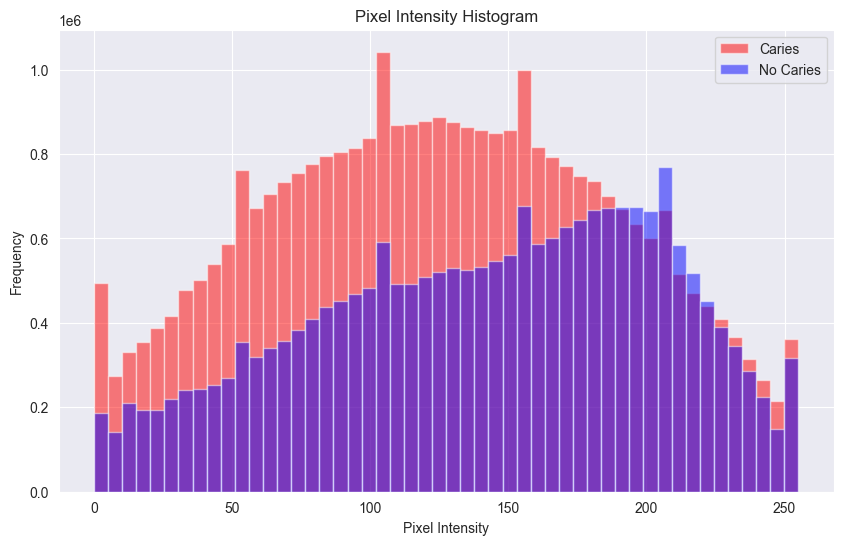

In [10]:
# Define the target image size
target_size = (224, 224)

# Function to load images and convert to NumPy array
def load_images_from_dir(directory):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]
    images = [img_to_array(load_img(img_path, target_size=target_size)) for img_path in image_paths]
    return np.array(images)

# Load caries images
caries_images = load_images_from_dir(os.path.join(train_dir, 'caries'))

# Load no caries images
no_caries_images = load_images_from_dir(os.path.join(train_dir, 'no-caries'))

# Plot histograms of pixel intensities
plt.figure(figsize=(10, 6))
plt.hist(caries_images.flatten(), bins=50, color='red', alpha=0.5, label='Caries')
plt.hist(no_caries_images.flatten(), bins=50, color='blue', alpha=0.5, label='No Caries')

plt.legend()
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

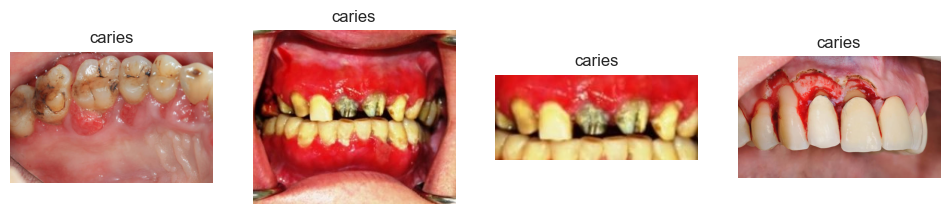

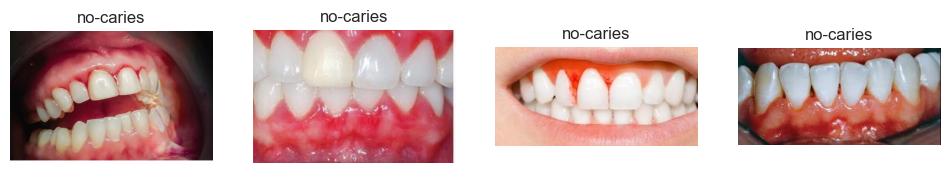

In [11]:
def display_samples(class_name, directory):
    plt.figure(figsize=(12, 6))
    for i in range(4):
        image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[i])
        img = Image.open(image_path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

display_samples('caries', train_dir)
display_samples('no-caries', train_dir)

# Data Augmentation

In [12]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Define batch size and target size
batch_size = 32
target_size = (224, 224)

# Create train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 361 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define batch size and target size
batch_size = 16
target_size = (224, 224)

# Create train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 361 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Displaying Some Augmented Images

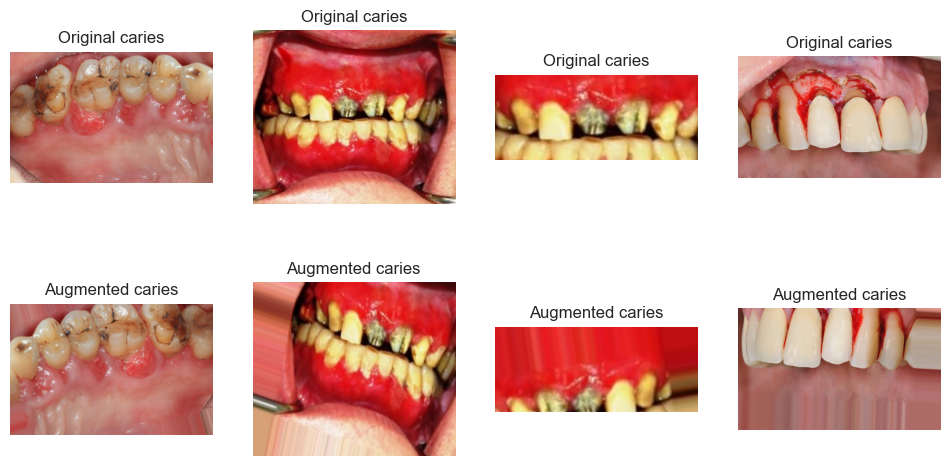

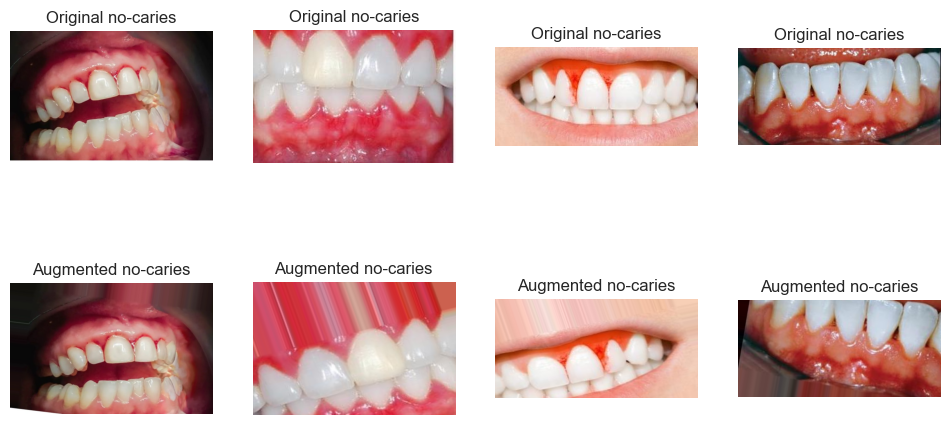

In [14]:

def display_augmented_images(class_name, directory, generator):
    plt.figure(figsize=(12, 6))
    for i in range(4):
        original_image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[i])
        original_img = Image.open(original_image_path)

        # Convert PIL Image to NumPy array
        original_array = np.array(original_img)

        # Apply random transformation to the NumPy array
        augmented_array = generator.random_transform(original_array)

        augmented_img = Image.fromarray(augmented_array)

        plt.subplot(2, 4, i + 1)
        plt.imshow(original_img)
        plt.title(f'Original {class_name}')
        plt.axis('off')

        plt.subplot(2, 4, i + 5)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {class_name}')
        plt.axis('off')
    plt.show()

# Display augmented images for 'caries' class
display_augmented_images('caries', train_dir, train_datagen)

# Display augmented images for 'no_caries' class
display_augmented_images('no-caries', train_dir, train_datagen)

# CNN Model

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [16]:
# Define input layer
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
conv_layer = Conv2D(32, (3, 3), activation='relu')(input_layer)
maxpool_layer = MaxPooling2D((2, 2))(conv_layer)

# Flatten layer
flatten_layer = Flatten()(maxpool_layer)

# Dense layers with regularization and dropout
dense_layer = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [17]:
# Model with regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout
model.add(Dense(1, activation='sigmoid'))

In [18]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1000,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/1000
23/23 [==============================] - 15s 601ms/step - loss: 3.3429 - accuracy: 0.6205 - val_loss: 3.2222 - val_accuracy: 0.5625
Epoch 2/1000
23/23 [==============================] - 14s 603ms/step - loss: 3.1774 - accuracy: 0.6177 - val_loss: 3.1934 - val_accuracy: 0.5625
Epoch 3/1000
23/23 [==============================] - 14s 594ms/step - loss: 3.1363 - accuracy: 0.6593 - val_loss: 3.2012 - val_accuracy: 0.6250
Epoch 4/1000
23/23 [==============================] - 12s 500ms/step - loss: 3.0699 - accuracy: 0.7008 - val_loss: 3.1145 - val_accuracy: 0.6250
Epoch 5/1000
23/23 [==============================] - 12s 536ms/step - loss: 3.0615 - accuracy: 0.7119 - val_loss: 3.0983 - val_accuracy: 0.6250
Epoch 6/1000
23/23 [==============================] - 14s 584ms/step - loss: 2.9691 - accuracy: 0.7285 - val_loss: 3.2692 - val_accuracy: 0.5625
Epoch 7/1000
23/23 [==============================] - 13s 580ms/step - loss: 3.0007 - accuracy: 0.6925 - val_loss: 3.1110 - val_ac

KeyboardInterrupt: 

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc:.2f}")

In [ ]:
# Generate predictions
predictions = model.predict(test_generator)
y_pred = np.round(predictions)

In [ ]:
# Suppress UndefinedMetricWarning warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_generator.classes, y_pred, target_names=class_names))

# Remove the filter after using
warnings.filterwarnings("default", category=UndefinedMetricWarning)

In [ ]:
# Plot learning curves
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

In [ ]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_generator.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Load a few test images and predict their labels
num_images_to_predict = 15  # Change this to the number of images you want to predict

# Get a few test images and their true labels
test_images, true_labels = next(test_generator)

# Predict labels for the test images
predicted_labels = model.predict(test_images)

# Convert predicted labels to binary (0 or 1)
predicted_labels = np.round(predicted_labels)

# Define class names
class_names = ['caries', 'no_caries']

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = (num_images_to_predict + num_rows - 1) // num_rows

# Display the test images along with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(num_images_to_predict):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[int(true_labels[i])]}, Predicted: {class_names[int(predicted_labels[i])]}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing between subplots
plt.show()

In [ ]:
!pip install torch
!pip3 install torch torchvision torchaudio
!pip install matplotlib

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt



In [ ]:
# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

In [ ]:
# Define class names
class_names = ['no_caries', 'caries']
# Define a function to perform inference and draw bounding boxes
def detect_and_display(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)
    with torch.no_grad():
        predictions = model([image_tensor])
    
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    ax = plt.gca()
    for box, label, score in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['scores']):
        if score > 0.5:  # Filter out low-confidence detections
            box = box.tolist()
            label = int(label)
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
            plt.text(box[0], box[1], f"{class_names[label]} {score:.2f}", fontsize=12, color='red')
    plt.axis('off')
    plt.show()

In [ ]:
def detect_and_display(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)
    with torch.no_grad():
        predictions = model([image_tensor])
    
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    ax = plt.gca()
    for box, score in zip(predictions[0]['boxes'], predictions[0]['scores']):
        if score > 0.5:  # Filter out low-confidence detections
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
            plt.text(box[0], box[1], f"caries {score:.2f}", fontsize=12, color='red')
        else:
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='green', linewidth=2))
            plt.text(box[0], box[1], f"no_caries {score:.2f}", fontsize=12, color='green')
    plt.axis('off')
    plt.show()


In [ ]:
image_path = "D:/projects/Caries Detection/teeth_dataset/test/no-caries/7011.jpg"
detect_and_display(image_path)

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import functional as F
from keras.preprocessing.image import ImageDataGenerator

# Define model architecture
num_classes = 2  # Assuming you have 2 classes: "no_caries" and "caries"
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))
model = FasterRCNN(
    backbone=torchvision.models.resnet50(pretrained=True),
    num_classes=num_classes,
    rpn_anchor_generator=anchor_generator
)

# Define optimizer and loss function
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
# Define your loss function here

# Training loop
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
for epoch in range(num_epochs):
    model.train()
    for i in range(len(train_generator)):
        images, targets = train_generator[i]
        images = torch.tensor(images, device=device)
        targets = [{k: torch.tensor(v, device=device) for k, v in t.items()} for t in targets]
        
        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs} completed.")

# Evaluation
model.eval()
# Run inference on the test dataset and compute metrics (e.g., mAP)
